In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Fertilizer Prediction.csv')

In [ ]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [ ]:
col=df.columns

In [ ]:
col

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [ ]:
df['Soil Type'].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [ ]:
df['Soil Type']=df['Soil Type'].map({'Loamy':0,'Sandy':1,'Clayey':2,'Black':3,'Red':4})

In [ ]:
df['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Pulses         10
Paddy          10
Wheat           9
Ground Nuts     7
Oil seeds       7
Barley          7
Tobacco         7
Maize           6
Name: Crop Type, dtype: int64

In [ ]:
map2={'Sugarcane':0,'Cotton':1, 'Millets':2, 'Paddy':3, 'Pulses':4, 'Wheat':5, 'Tobacco':6, 'Barley':7,'Oil seeds':8,'Ground Nuts':9, 'Maize':10 }
df['Crop Type']=df['Crop Type'].map(map2)

In [ ]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
10-26-26     7
17-17-17     7
Name: Fertilizer Name, dtype: int64

In [ ]:
df['Fertilizer Name']=df['Fertilizer Name'].map({'Urea':0,'DAP':1,'28-28':2,'14-35-14':3,'20-20':4,'17-17-17':5,'10-26-26':6})

In [ ]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,1,10,37,0,0,0
1,29,52,45,0,0,12,0,36,1
2,34,65,62,3,1,7,9,30,3
3,32,62,34,4,6,22,0,20,2
4,28,54,46,2,3,35,0,0,0
...,...,...,...,...,...,...,...,...,...
94,25,50,32,2,4,24,0,19,2
95,30,60,27,4,6,4,17,17,6
96,38,72,51,0,5,39,0,0,0
97,36,60,43,1,2,15,0,41,1


In [ ]:
df.corr()['Fertilizer Name']

Temparature       -0.132785
Humidity          -0.091957
Moisture           0.060883
Soil Type         -0.051878
Crop Type         -0.037758
Nitrogen          -0.740348
Potassium          0.742392
Phosphorous        0.112763
Fertilizer Name    1.000000
Name: Fertilizer Name, dtype: float64

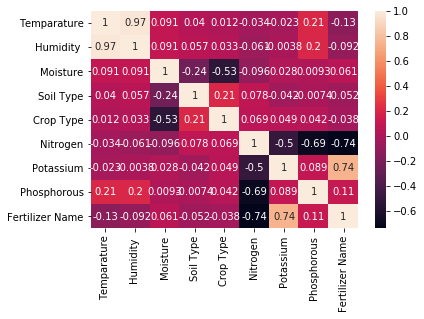

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

HERE WE CAN SAY FERTILIZER NAME DOEST DEPEND MUCH ON TEMPARATURE AND HUMIDITY SO WE CAN DROP THOSE COLUMNS

In [ ]:
df.drop(['Temparature'],axis=1,inplace=True)

In [ ]:
df.drop(['Humidity '],axis=1,inplace=True)

In [ ]:
df

,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,38,1,10,37,0,0,0
1,45,0,0,12,0,36,1
2,62,3,1,7,9,30,3
3,34,4,6,22,0,20,2
4,46,2,3,35,0,0,0
...,...,...,...,...,...,...,...
94,32,2,4,24,0,19,2
95,27,4,6,4,17,17,6
96,51,0,5,39,0,0,0
97,43,1,2,15,0,41,1


# SPLITING THE DATA

In [ ]:
y=df['Fertilizer Name']

In [ ]:
y

0     0
1     1
2     3
3     2
4     0
     ..
94    2
95    6
96    0
97    1
98    4
Name: Fertilizer Name, Length: 99, dtype: int64

In [ ]:
X=df.drop(['Fertilizer Name'],axis=1)

In [ ]:
X

,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,38,1,10,37,0,0
1,45,0,0,12,0,36
2,62,3,1,7,9,30
3,34,4,6,22,0,20
4,46,2,3,35,0,0
...,...,...,...,...,...,...
94,32,2,4,24,0,19
95,27,4,6,4,17,17
96,51,0,5,39,0,0
97,43,1,2,15,0,41


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train

,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
49,51,1,10,5,9,29
70,39,2,4,21,0,23
68,40,2,4,6,19,16
15,49,3,0,10,13,14
39,34,1,2,15,0,37
...,...,...,...,...,...,...
60,41,2,3,36,0,0
71,32,4,6,39,0,0
14,31,4,9,14,0,41
92,41,4,9,41,0,0


In [ ]:
y_train

49    3
70    2
68    6
15    5
39    1
     ..
60    0
71    0
14    1
92    0
51    4
Name: Fertilizer Name, Length: 79, dtype: int64

# BUILDING A MODEL

# LOGISTIC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train, y_train)


In [ ]:
# Prediction
y_predic = clf.predict(X_test)

acc = accuracy_score(y_test, y_predic)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 95.0


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("KNN model accuracy (in %):", acc*100)

KNN model accuracy (in %): 100.0


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train) 
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[36638.20253164556,
 20889.06150793651,
 14787.336538461539,
 11312.542562724015,
 8713.233138238575,
 7046.3110916860915,
 6034.148717948718,
 5074.0876068376065,
 4493.9215728715735,
 3989.655303030303]

In [ ]:
K = range(1,11)

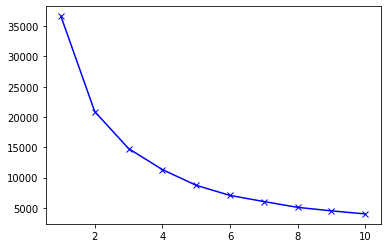

In [ ]:
plt.plot(K, wcss, 'bx-')
plt.show()

# PICKLE FILE

In [ ]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([4, 4, 6, 0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 3, 1, 0, 1, 0, 6, 0],
      dtype=int64)

# PREDICTING THE USER INPUT VALUES

In [ ]:
# ['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type','Nitrogen', 'Potassium', 'Phosphorous']
l=[]
l1=[]
l1.append(int(input('Enter the temparature : ')))
l1.append(int(input('Enter the  Humidity : ')))
l.append(int(input('Enter the Moisture : ')))
l.append(input('Enter the Soil Type : '))
l.append(input('Enter the Crop Type : '))
l.append(int(input('Enter the Nitrogen level :')))
l.append(int(input('Enter the Potassium level :')))
l.append(int(input('Enter the Phosphorous level :')))

Enter the temparature : 26
Enter the  Humidity : 52
Enter the Moisture : 26
Enter the Soil Type : Sandy
Enter the Crop Type : Maize
Enter the Nitrogen level :52
Enter the Potassium level :0
Enter the Phosphorous level :0


In [ ]:
x=pd.DataFrame([l],columns=['Moisture', 'Soil Type', 'Crop Type','Nitrogen', 'Potassium', 'Phosphorous'])

In [ ]:
x

,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,Sandy,Maize,52,0,0


In [ ]:
x['Soil Type']=x['Soil Type'].map({'Loamy':0,'Sandy':1,'Clayey':2,'Black':3,'Red':4})
map2={'Sugarcane':0,'Cotton':1, 'Millets':2, 'Paddy':3, 'Pulses':4, 'Wheat':5, 'Tobacco':6, 'Barley':7,'Oil seeds':8,'Ground Nuts':9, 'Maize':10 }
x['Crop Type']=x['Crop Type'].map(map2)

In [ ]:
a=pickled_model.predict(x)

In [ ]:
a=pd.DataFrame(a)
a

,0
0,0


In [ ]:
a[0]=a[0].map({0:'Urea',1:'DAP',2:'28-28',3:'14-35-14',4:'20-20',5:'17-17-17',6:'10-26-26'})

In [ ]:
a[0]

0    Urea
Name: 0, dtype: object